In [1]:
# data source: UCI machine learning repository (http://archive.ics.uci.edu/ml/datasets/Adult)
# task: to predict whether an individual makes more than 50k a year, given U.S. census data

In [2]:
%reset -f

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(123)

In [3]:
# import dataset
full = pd.read_csv('../data/adult_income_50k/adult_data.txt', header=None)

# set column names
full.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
                'sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [4]:
# view data types and check for missing values
print(full.info()) # no missing values

# view summary statistics
print(full.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18621 entries, 0 to 18620
Data columns (total 15 columns):
age               18621 non-null int64
workclass         18621 non-null object
fnlwgt            18621 non-null int64
education         18621 non-null object
education-num     18621 non-null int64
marital-status    18621 non-null object
occupation        18621 non-null object
relationship      18621 non-null object
race              18621 non-null object
sex               18621 non-null object
capital-gain      18621 non-null int64
capital-loss      18621 non-null int64
hours-per-week    18621 non-null int64
native-country    18621 non-null object
income            18621 non-null object
dtypes: int64(6), object(9)
memory usage: 2.1+ MB
None
                 age workclass        fnlwgt education  education-num  \
count   18621.000000     18621  1.862100e+04     18621   18621.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   

The percentage of people in the majority class is: 76.1


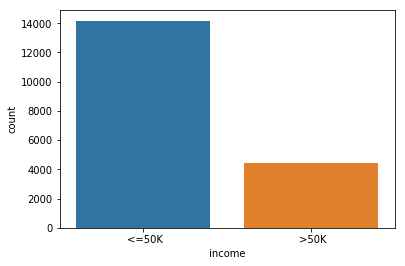

In [5]:
# view distribution of target variable
sns.countplot(full['income'])

# calculate percentage of people in the majority class (this will be our baseline accuracy)
print('The percentage of people in the majority class is: %.1f' % (full['income'].value_counts()*100/len(full['income'])).max())

In [6]:
# recode target variable
full['income'] = full['income'].replace({' >50K':1, ' <=50K':0})

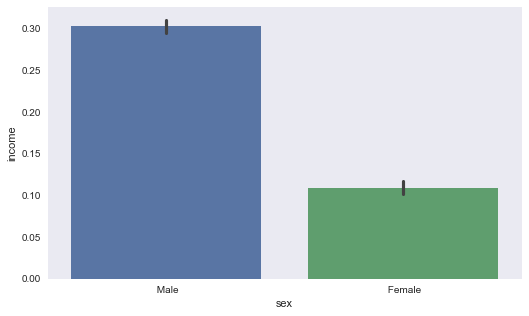

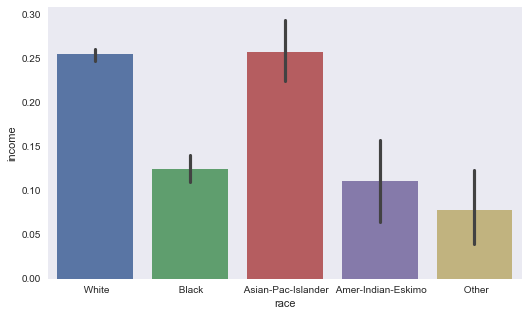

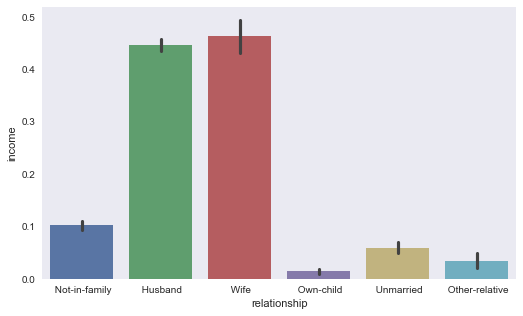

In [7]:
# set figure size
sns.set(rc={'figure.figsize':(8.5,5)})
# set figure style
sns.set_style('dark') # available styles: darkgrid, whitegrid, dark, white, ticks

# data visualization: barplots
sns.barplot(x='sex', y='income', data=full)
plt.show()
sns.barplot(x='race', y='income', data=full)
plt.show()
sns.barplot(x='relationship', y='income', data=full)
plt.show()

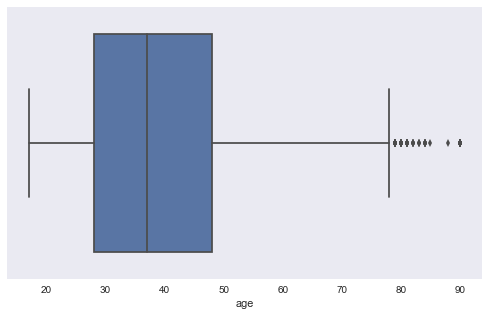

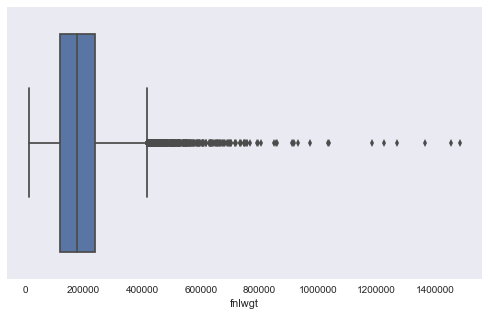

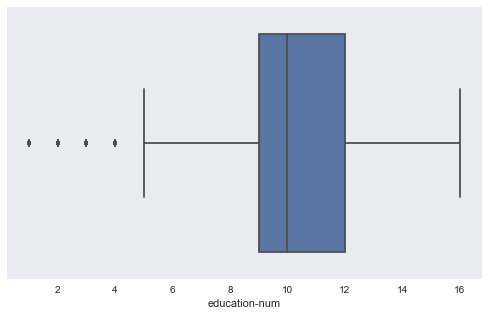

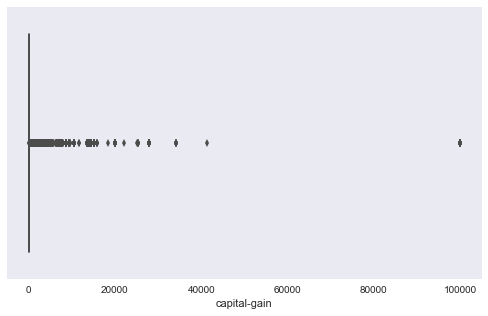

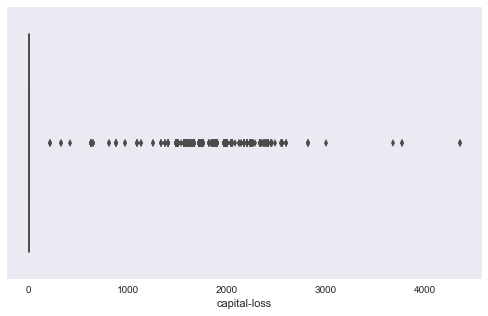

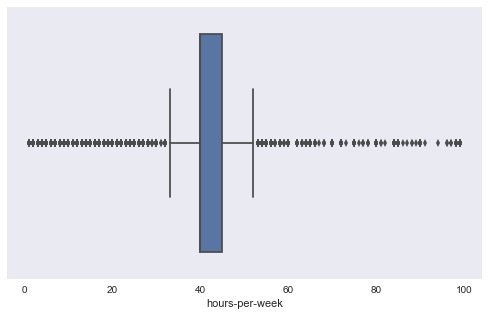

In [8]:
# compile a list of all the numeric features
numeric_features = []

for i in full.columns:
    if full[i].dtype=='int64' and i!='income': # all numeric features in the dataset are of type int64
        numeric_features.append(i)

# data visualization: boxplots
for i in numeric_features:
    sns.boxplot(full[i]) # some outliers, but no obvious data entry errors
    plt.show()

In [9]:
# extract target variable
target = full['income']
del full['income']

In [10]:
# compile a list of all the string features
string_features = []

for i in full.columns:
    if full[i].dtype=='object':
        string_features.append(i)

# view value counts of each string feature
for i in string_features:
    print(full[i].value_counts())
print('-'*50)

# combine low-frequency categories of string features (name the combined category as 'Others')
for i in string_features:
    series = pd.value_counts(full[i])
    mask = (series/series.sum() * 100).lt(5) # categories with <5% frequency will be flagged as True
    full[i] = np.where(full[i].isin(series[mask].index),'Others',full[i]) # recode categories with <5% frequency to 'Others'
del series, mask

# verify that low-frequency categories have been combined
for i in string_features:
    print(full[i].value_counts())

 Private             12979
 Self-emp-not-inc     1469
 Local-gov            1170
 ?                    1046
 State-gov             748
 Self-emp-inc          643
 Federal-gov           558
 Without-pay             5
 Never-worked            3
Name: workclass, dtype: int64
 HS-grad         6087
 Some-college    4161
 Bachelors       3102
 Masters          981
 Assoc-voc        779
 11th             667
 Assoc-acdm       591
 10th             528
 7th-8th          366
 Prof-school      316
 9th              290
 Doctorate        238
 12th             212
 5th-6th          188
 1st-4th           90
 Preschool         25
Name: education, dtype: int64
 Married-civ-spouse       8560
 Never-married            6111
 Divorced                 2543
 Separated                 580
 Widowed                   576
 Married-spouse-absent     237
 Married-AF-spouse          14
Name: marital-status, dtype: int64
 Prof-specialty       2359
 Craft-repair         2309
 Exec-managerial      2289
 Adm-clerica

In [11]:
# one-hot encode string variables
full = pd.get_dummies(full)

In [12]:
# dimensionality reduction via PCA
from sklearn.preprocessing import StandardScaler
full_scaled = StandardScaler().fit_transform(full)

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
full_scaled_pc = pca.fit_transform(full_scaled)

print('percentage of variance explained by PC:\n', pca.explained_variance_ratio_)

three_principal_components = pd.DataFrame(pd.DataFrame(full_scaled_pc).iloc[:,0:3].values, columns=['pc1','pc2','pc3'])

full = pd.concat([full, three_principal_components], axis='columns')

del full_scaled, pca, full_scaled_pc, three_principal_components

percentage of variance explained by PC:
 [1.07836298e-01 6.50960415e-02 6.08901320e-02 5.80068300e-02
 5.45439713e-02 4.22140068e-02 4.06594768e-02 3.57449113e-02
 3.44754981e-02 3.27799750e-02 2.99204937e-02 2.91066505e-02
 2.87273081e-02 2.80997220e-02 2.77641855e-02 2.70755275e-02
 2.66492197e-02 2.61502519e-02 2.51351173e-02 2.42847615e-02
 2.41686080e-02 2.21902952e-02 2.21034365e-02 2.14097603e-02
 1.95436838e-02 1.90502840e-02 1.57021780e-02 1.56281490e-02
 1.43701305e-02 1.16802233e-02 7.47975522e-03 1.47287687e-03
 4.02409353e-05 2.12669599e-32 3.20684656e-33 2.62645202e-33
 1.15867608e-33 1.14529012e-33 1.02239389e-33 7.07263558e-34
 6.09327942e-34]


In [13]:
# prepare for data visualizations
full_target = pd.concat([full,target], axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


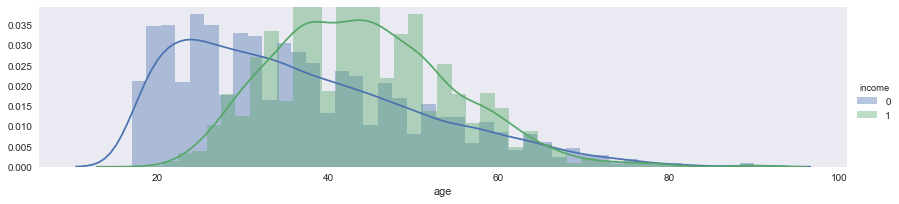

In [14]:
# data visualization: kernel density plots
a = sns.FacetGrid(full_target, hue = 'income', aspect=4 ) # use the dataset 'full_target', and plot one 'age' distribution per category of 'income'
a.map(sns.distplot, 'age', kde=True) # kernel density plot of 'age'
a.add_legend() # add a legend for the distributions

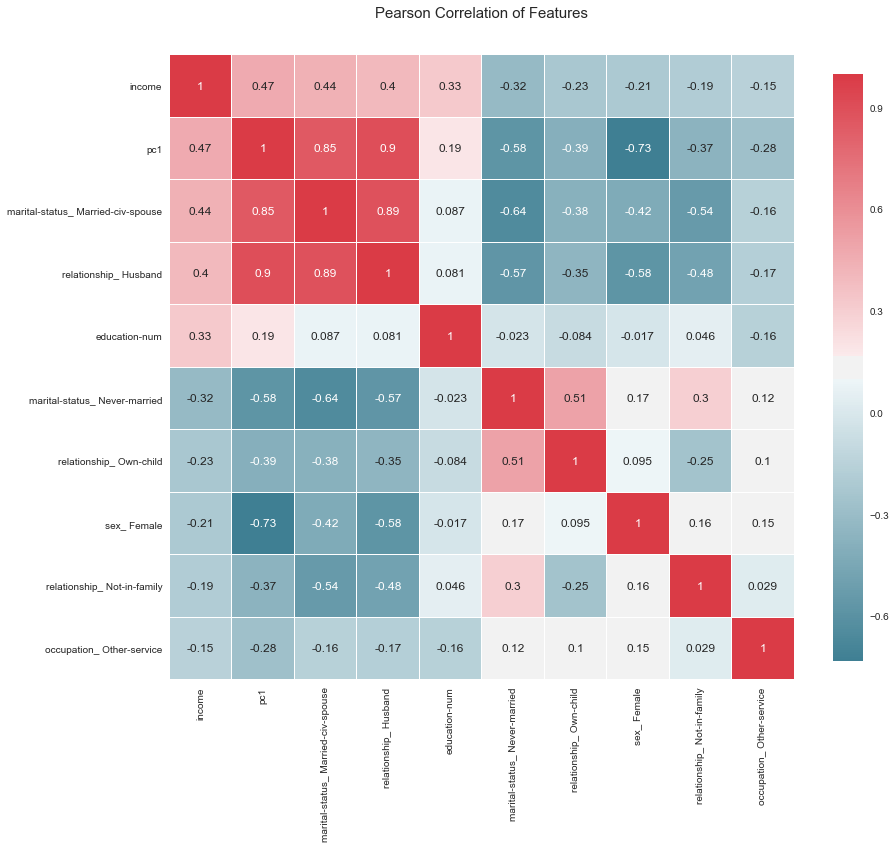

In [15]:
# data visualization: correlation heatmap
full_target_corr = pd.concat([full_target[full_target.corr()['income'].sort_values(ascending=False)[0:5].index], # top variables most positively correlated with income
                              full_target[full_target.corr()['income'].sort_values(ascending=True)[0:5].index]], # top variables most negatively correlated with income
                             axis=1)

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(full_target_corr)

In [16]:
# delete objects that are no longer needed
del full_target, full_target_corr

In [17]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(full, target, test_size=0.3)

In [18]:
# train and evaluate the ML model without optimizing its hyperparameters
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(xtrain,ytrain)
print('Without optimization, the test accuracy is %.1f' % (xgb.score(xtest, ytest)*100))

Without optimization, the test accuracy is 85.7


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
# optimize hyperparameters of ML model via random search, while building the optimal model concurrently
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import model_selection

param_dist = {'objective': ['binary:logistic'],
              'learning_rate': uniform(0.01,0.3),
              'max_depth': randint(1,10),
              'n_estimators': randint(60,200)
             }

tune_model = model_selection.RandomizedSearchCV(XGBClassifier(),
                                                param_distributions=param_dist,
                                                scoring = 'accuracy',
                                                cv = 3,
                                                n_iter = 10) # number of iterations of random search

tune_model.fit(xtrain, ytrain)

#print(tune_model.cv_results_['params'])
print('the optimized hyperparameters are: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("after optimization, the mean training accuracy is: {:.1f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("after optimization, the mean validation accuracy is: {:.1f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

the optimized hyperparameters are:  {'learning_rate': 0.1358978286117016, 'max_depth': 6, 'n_estimators': 63, 'objective': 'binary:logistic'}
after optimization, the mean training accuracy is: 89.7
after optimization, the mean validation accuracy is: 86.6


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [20]:
# calculate test accuracy
print('After optimization, the test accuracy is %.1f' % (tune_model.score(xtest, ytest)*100))

After optimization, the test accuracy is 86.0


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
